In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [3]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [4]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}

In [5]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [6]:
n, p = len(stoi), len(stoi)
N = torch.zeros(n, p)
for w in words:
    for i in range(len(w)):
        if i == 0:
            N[stoi[w[i]], stoi['.']] += 1
        if i == len(w)-1:
            N[stoi['.'], stoi[w[i]]] += 1
        else:
            N[stoi[w[i-1]], stoi[w[i]]] += 1

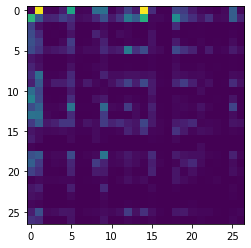

In [7]:
# display the matrix
plt.imshow(N)

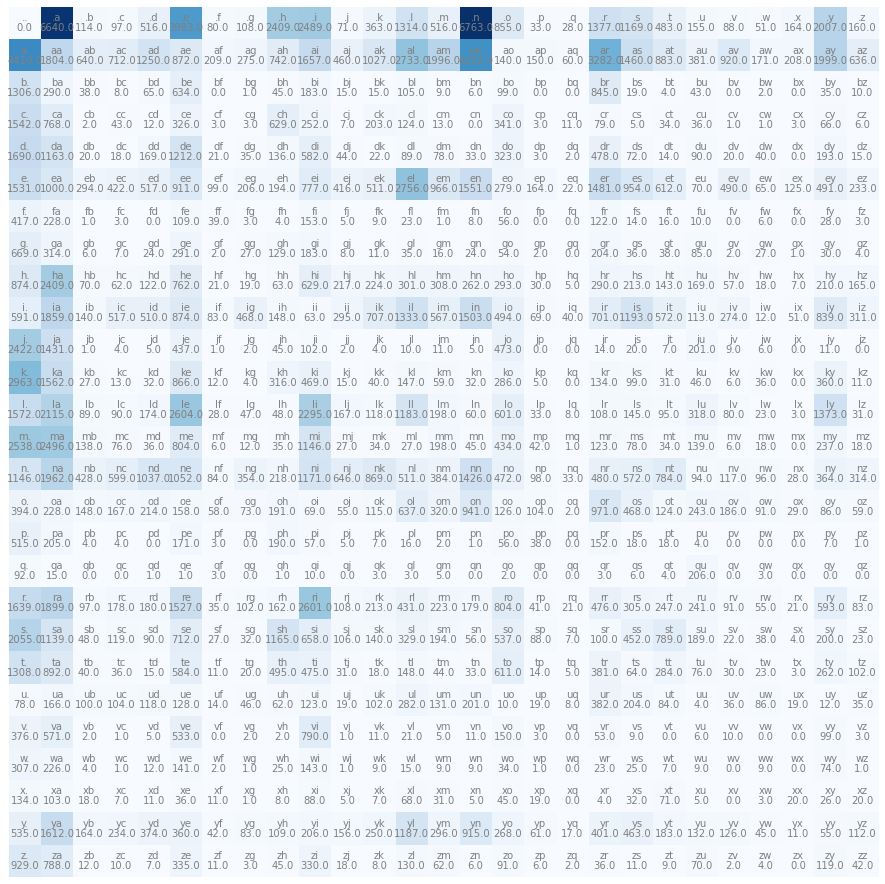

In [8]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [9]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [10]:
P = N / N.sum(1, keepdim=True)

In [11]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1, generator=g).item()
        out.append(itos[ix])
        if ix == 0: 
            break
    print(''.join(out))

aunjded.
anakaz.
a.
elay.
a.
nna.
shinltoliaas.
tet.
ndameiauranilevias.
dedainrwim.
a.
s.
ayinaylartelinveumesyf.
etume.
nonns.
ejaruani.
horeayaenoc.
ayjaabd.
nerimikim.
ynin.
anaasnhavilesusushddgos.
mitancil.
nejainnmiyde.
r.
nreli.
isameys.
rmjeaum.
mahaubrialeva.
nc.
arr.


In [12]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [13]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [14]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [15]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, requires_grad=True)
#W.requires_grad=True

In [16]:
# training loop
for k in range(20):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # encode xs with F.one_hot
    logits = xenc @ W  # compute the logits
    counts = torch.softmax(logits, 1) 
    loss = -torch.mean(torch.log(counts[torch.arange(num), ys]))  

    # backward pass
    W.grad=None
    loss.backward()
    # update
    W.data -=(50)*W.grad.data
    
    print(loss.item())

3.7191109657287598
3.3439102172851562
3.1442055702209473
3.0091588497161865
2.912109136581421
2.8420023918151855
2.790081739425659
2.7502543926239014
2.718813896179199
2.6933677196502686
2.672295570373535
2.6544930934906006
2.6392059326171875
2.625906229019165
2.6142125129699707
2.6038408279418945
2.594574213027954
2.5862441062927246
2.5787172317504883
2.5718863010406494


In [17]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        counts = torch.softmax(logits, 1)
        ix = torch.multinomial(counts[0], 1, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

juwjde
janaqvh
pshfqy
a
nn
kuhin
tolian
jtha
ksahnaauya
milevias


In [18]:
# Exercise 3: homework (*) extend the previous model to trigram

In [19]:
# create a training set for trigram model
xs_trig = []
ys_trig = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs_trig.append((ix1, ix2))
        ys_trig.append(ix3)
xs_trig = torch.tensor(xs)
ys_trig = torch.tensor(ys)
num = xs_trig.nelement()

/var/folders/ly/wpr5scy91hvfcf582r9f5zfh0000gn/T/ipykernel_17573/1145850953.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs_trig = torch.tensor(xs)
/var/folders/ly/wpr5scy91hvfcf582r9f5zfh0000gn/T/ipykernel_17573/1145850953.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ys_trig = torch.tensor(ys)


In [20]:
W_trig = torch.randn(27, 27, requires_grad=True)
# training loop
for k in range(20):
    #forward pass
    xenc_trig = F.one_hot(xs_trig, num_classes=27).float()  # encode xs with F.one_hot
    logits_trig = xenc_trig @ W_trig  # compute the logits
    counts_trig = torch.softmax(logits_trig, 1) 
    loss_trig = -torch.mean(torch.log(counts_trig[torch.arange(num), ys_trig]))  

    # backward pass
    W_trig.grad=None
    loss_trig.backward()
    # update
    W_trig.data -=(100)*W_trig.grad.data
    
    print(loss_trig.item())

3.8731343746185303
3.157092571258545
2.9199302196502686
2.8226943016052246
2.7475879192352295
2.7197368144989014
2.668684244155884
2.6494553089141846
2.6240527629852295
2.625221014022827
2.5933423042297363
2.589552402496338
2.575624465942383
2.585590124130249
2.55898380279541
2.560311794281006
2.5509417057037354
2.564669609069824
2.5396385192871094
2.542795181274414


In [21]:
for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits_trig = x @ W_trig
        counts_trig = torch.softmax(logits_trig, 1)
        ix = torch.multinomial(counts_trig[0], 1, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

dbdainrwie
ta
seja
elyla
te
fnveumerif
on
mme
ponnsh
jariayl


In [22]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [23]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [25]:
emb_size = 300
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, emb_size, requires_grad=True)
W1 = torch.randn(emb_size * block_size, 128, requires_grad=True)
b1 = torch.randn(128, requires_grad=True)
W2 = torch.randn(128, 27, requires_grad=True)
b2 = torch.randn(27, requires_grad=True)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True


In [26]:
# init weights (use torch.nn.init)
b1 = torch.nn.init.normal_(b1)
b2 = torch.nn.init.normal_(b2)
W1 = torch.nn.init.normal_(W1)
W2 = torch.nn.init.normal_(W2)

In [27]:
stepi = []
lossi = []

In [28]:
for p in parameters:
    p.requires_grad = True

In [29]:
# training loop (use the cross-entropy loss)
batch_size = 3000
for i in range(2000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,))

    # forward pass
    emb = C[X_train[ix]].view(-1, emb_size * block_size)
    h=torch.tanh(emb@W1+b1)  # hint: to flatten a tensor x, use x.view (-1, ...)
    logits = torch.tanh(h@W2+b2)
    loss = F.cross_entropy(logits, Y_train[ix]) # I used the cross entropu loss function but i am not sure if this is what was expected. I didn't find the loss function that was supposed to be used in the pdf of the course. 
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data -= 50 * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    print(i, loss)

0 tensor(3.6689, grad_fn=<NllLossBackward0>)
1 tensor(3.3366, grad_fn=<NllLossBackward0>)
2 tensor(3.2569, grad_fn=<NllLossBackward0>)
3 tensor(3.1390, grad_fn=<NllLossBackward0>)
4 tensor(3.0958, grad_fn=<NllLossBackward0>)
5 tensor(3.0637, grad_fn=<NllLossBackward0>)
6 tensor(3.0770, grad_fn=<NllLossBackward0>)
7 tensor(3.0244, grad_fn=<NllLossBackward0>)
8 tensor(3.0425, grad_fn=<NllLossBackward0>)
9 tensor(2.9957, grad_fn=<NllLossBackward0>)
10 tensor(2.9646, grad_fn=<NllLossBackward0>)
11 tensor(2.9452, grad_fn=<NllLossBackward0>)
12 tensor(2.9264, grad_fn=<NllLossBackward0>)
13 tensor(2.9289, grad_fn=<NllLossBackward0>)
14 tensor(2.9290, grad_fn=<NllLossBackward0>)
15 tensor(2.9314, grad_fn=<NllLossBackward0>)
16 tensor(2.8999, grad_fn=<NllLossBackward0>)
17 tensor(2.8861, grad_fn=<NllLossBackward0>)
18 tensor(2.8685, grad_fn=<NllLossBackward0>)
19 tensor(2.8839, grad_fn=<NllLossBackward0>)
20 tensor(2.8412, grad_fn=<NllLossBackward0>)
21 tensor(2.8610, grad_fn=<NllLossBackward0>

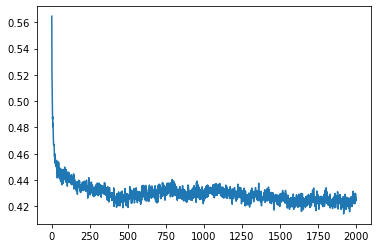

In [30]:
plt.plot(stepi, lossi)

In [ ]:
# compute the train and val loss

In [ ]:
# compute the train and val loss.  here are the initial results I got.  
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.

In [31]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0] * block_size 
    while True:
      emb = C[torch.tensor([context])].view(-1, emb_size * block_size) # (1,block_size,d)
      h = torch.tanh(emb @ W1 + b1)
      logits = torch.tanh(h @ W2 + b2)
      probs = F.softmax(logits, 1)
      ix = torch.multinomial(probs[0], 1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

shylp.
owyxqdkvfqcerykmylyjijlysi.
laj.
sydynhbaunji.
er.
lsa.
ixandreei.
tusswylzi.
ulfctnnwacelnpjonisoziieqninsiinllyysa.
xsqe.
lon.
ssbqzkiaafizg.
sdsawmaa.
slvdinaktamgrmeeulorin.
azmgnibijosel.
amnizenbilavynnonhejzbonisyaukjo.
ejmi.
aevwri.
ilzabwuqdhabandlynhhewchie.
keec.


In [ ]:
# Exercise 5 homework (*): add batchnorm to your network and report the results
# Batch norm is added between the linear layer and the non-linearity
# How many parameters does this add to your network?
